In [6]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
from scipy import stats
import seaborn as sns

In [7]:
x=pd.read_csv('../_xlable4_withNa_AllColumns_OnDrugForLipid.txt')
y=pd.read_csv('../_targelable4_withNa_AllColumns_OnDrugForLipid.txt')

y=y[['Unnamed: 0','L103000']]

In [8]:
data= pd.merge(x,y, how='inner',left_on='Unnamed: 0', right_on='Unnamed: 0')
data['max']=np.min(data[['FIELD_6','FIELD_7']],axis=1)
data=data.drop(columns=['FIELD_6','FIELD_7'])

In [9]:
# data=data.query('FIELD_15 !=1 and FIELD_17 !=1 and FIELD_22 != 1 and FIELD_24 != 1 and FIELD_16 != 1 and FIELD_23 != 1')
# data=data.query('FIELD_16 != 1 and FIELD_23 != 1')

In [10]:
# data=data[data.SEX==0]
# data=data[data.FIELD_15!=1]
# data=data[data.FIELD_17!=1]
# data=data[data.FIELD_22!=1]
# data=data[data.FIELD_24!=1]
# data=data[data.AGE>=40]
# data=data[data.AGE<50]

print(data.shape)

(1432, 408)


In [11]:
#split column types to categorical and numerical
numerical_cols = list(data.columns[~data.columns.str.startswith('FIELD')])
categorical_cols = list(data.columns[data.columns.str.startswith('FIELD')])

Calculate correlation Value - for numerical values
========

In [12]:
corr=data[numerical_cols].corr()
corr=corr.L103000_y
corrvalPD=pd.DataFrame()
corrvalPD['Col']=corr.index
corrvalPD['val']=abs(corr.values)

corrvalPD=corrvalPD.sort_values(by='val',ascending=False)
corrvalPD.head()

,Col,val
160,L502800,1.000000
278,L103000_y,1.000000
143,L500200,0.989848
73,L138200,0.873813
174,L511000,0.693168


In [13]:
#count of none NA values of feature set
mydataset=data.copy()[numerical_cols]
colCount=[]
for i in mydataset.columns:
    colCount.append([i,mydataset[i].dropna().shape[0]])

colCountPD=pd.DataFrame(colCount,columns=['Col','Count'])
colCountPD.head()

,Col,Count
0,Unnamed: 0,1432
1,index,1432
2,COMPARE,1432
3,AGE,1432
4,B_DAY,1432


In [16]:
mergedColCorrCount=pd.merge(corrvalPD,colCountPD,how='inner',left_on='Col',right_on='Col')
mergedColCorrCount=mergedColCorrCount[mergedColCorrCount.Count>500]
mergedColCorrCount=mergedColCorrCount.sort_values(by='val', ascending=False)
mergedColCorrCount.head(20)

,Col,val,Count
1,L103000_y,1.000000,1428
6,L103000_x,0.549489,1431
9,L103300,0.332903,1260
11,L103100,0.315721,1431
17,L104400,0.261220,691
18,L101700,0.252477,1431
19,L100700,0.246639,1371
21,S000200,0.233130,1432
25,S001200,0.211352,1431
27,SEX,0.198277,1432


In [17]:
print(list(mergedColCorrCount.head(18).Col))

['L103000_y', 'L103000_x', 'L103300', 'L103100', 'L104400', 'L101700', 'L100700', 'S000200', 'S001200', 'SEX', 'L100800', 'S000300', 'L191100', 'S000502', 'L100500', 'L190000', 'L104300', 'AGE']


Anova test - For categorical values [Questionnaire answers]
=======

In [18]:
mydataset=data.copy()[categorical_cols] #[np.insert(categorical_cols,0,'L100800')]

# mydataset=mydataset.drop(columns=['FIELD_1','FIELD_2','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39','FIELD_88',
#                            'FIELD_89','FIELD_109','FIELD_110','FIELD_111','FIELD_70','FIELD_82','FIELD_85','FIELD_91',
#                            'FIELD_103','FIELD_106'])

# mydataset=mydataset.drop(columns=['FIELD_1','FIELD_2','FIELD_87','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39',
#                                   'FIELD_88','FIELD_89', 'FIELD_108','FIELD_109','FIELD_110','FIELD_111','FIELD_82',
#                                  'FIELD_91','FIELD_103','FIELD_118','FIELD_119','FIELD_120','FIELD_121','FIELD_122',
#                                  'FIELD_123','FIELD_124','FIELD_125','FIELD_126','FIELD_127','FIELD_128','FIELD_129',
#                                  'FIELD_130','FIELD_131','FIELD_132','FIELD_133','FIELD_134','FIELD_135','FIELD_136',
#                                   'FIELD_137','FIELD_138','FIELD_139','FIELD_140'])


mydataset=mydataset.drop(columns=['FIELD_1','FIELD_2','FIELD_87','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39',
                                  'FIELD_88','FIELD_89', 'FIELD_108','FIELD_109','FIELD_110','FIELD_111','FIELD_82',
                                 'FIELD_91','FIELD_103','FIELD_118','FIELD_119','FIELD_120','FIELD_121','FIELD_122',
                                 'FIELD_123','FIELD_124','FIELD_125','FIELD_126','FIELD_127','FIELD_128','FIELD_129',
                                 'FIELD_130','FIELD_131','FIELD_132','FIELD_133','FIELD_134','FIELD_135','FIELD_136',
                                  'FIELD_137','FIELD_138','FIELD_139','FIELD_140',
                                  'FIELD_64','FIELD_65','FIELD_66','FIELD_67','FIELD_68','FIELD_69','FIELD_70','FIELD_72',
                                  'FIELD_73','FIELD_74','FIELD_75','FIELD_76','FIELD_77','FIELD_80','FIELD_81','FIELD_84',
                                  'FIELD_85','FIELD_90','FIELD_93','FIELD_94','FIELD_95','FIELD_96','FIELD_97','FIELD_98',
                                  'FIELD_101','FIELD_102','FIELD_105','FIELD_106','FIELD_112','FIELD_113','FIELD_114',
                                  'FIELD_115','FIELD_116','FIELD_117','FIELD_118','FIELD_119','FIELD_9'
                                 ])


mydataset=mydataset.drop(mydataset[mydataset.FIELD_3=='`'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_3=='G'].index)


mydataset=mydataset.drop(mydataset[mydataset.FIELD_4=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_5=='.'].index)

mydataset=mydataset.drop(mydataset[mydataset.FIELD_35=='?'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_35=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_36=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_37=='\\'].index)
 
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '7+' ].index)
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '5~7'].index)
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '3-4'].index)


# mydataset=mydataset.drop(mydataset[mydataset.FIELD_95=='.'].index)

In [19]:
colslist=mydataset.columns
DiabeticColVals=data.L103000_y

cor=[]
pval=[]
count=[]

for i in range(len(colslist)):
    print(i,colslist[i])
    
    temp=pd.DataFrame([])
    temp['a']=DiabeticColVals
    temp['b']=mydataset[colslist[i]].astype(float)
    temp=temp.dropna()
    count.append(temp.shape[0])
    
    uniquevalues=temp.b.unique()
    
    selectedGroupVals=[]
    for k in range(len(uniquevalues)):
        selectedGroupVals.append(np.asarray(temp[temp['b']==uniquevalues[k]].a))

    F, p = stats.f_oneway(*selectedGroupVals)
    cor.append(F)
    pval.append(p)
    

0 FIELD_3
1 FIELD_4
2 FIELD_5
3 FIELD_13
4 FIELD_14
5 FIELD_15
6 FIELD_16
7 FIELD_17
8 FIELD_18
9 FIELD_19
10 FIELD_20
11 FIELD_21
12 FIELD_22
13 FIELD_23
14 FIELD_24
15 FIELD_25
16 FIELD_26
17 FIELD_27
18 FIELD_28
19 FIELD_29
20 FIELD_30
21 FIELD_31
22 FIELD_32
23 FIELD_33
24 FIELD_34
25 FIELD_35
26 FIELD_36
27 FIELD_37
28 FIELD_38
29 FIELD_40
30 FIELD_41
31 FIELD_42
32 FIELD_43
33 FIELD_44
34 FIELD_45
35 FIELD_46
36 FIELD_47
37 FIELD_48
38 FIELD_49
39 FIELD_50
40 FIELD_51
41 FIELD_52
42 FIELD_53
43 FIELD_54
44 FIELD_55
45 FIELD_56
46 FIELD_57
47 FIELD_58
48 FIELD_59
49 FIELD_60
50 FIELD_61
51 FIELD_62
52 FIELD_63


In [21]:
FvalPvalCorr=pd.DataFrame()    
FvalPvalCorr['Cols']=colslist
FvalPvalCorr['F']=cor
FvalPvalCorr['P']=pval
FvalPvalCorr['Count']=count
FvalPvalCorr=FvalPvalCorr.sort_values(by='F', ascending=False)


In [22]:
FvalPvalCorr[FvalPvalCorr.Count>500].head(10)

,Cols,F,P,Count
23,FIELD_33,44.118396,2.571577e-19,1426
28,FIELD_38,10.276092,1.289799e-12,1427
30,FIELD_41,5.816904,1.144844e-06,1426
8,FIELD_18,5.782534,1.631299e-02,1428
15,FIELD_25,4.720739,2.996515e-02,1428
31,FIELD_42,4.399739,7.615090e-05,1425
29,FIELD_40,3.861039,3.590489e-04,1427
22,FIELD_32,3.372433,3.458105e-02,1423
25,FIELD_35,2.307446,1.135260e-03,513
21,FIELD_31,2.224367,1.360695e-01,1428


In [23]:
print(list(FvalPvalCorr[FvalPvalCorr.Count>500].Cols)[:10])

['FIELD_33', 'FIELD_38', 'FIELD_41', 'FIELD_18', 'FIELD_25', 'FIELD_42', 'FIELD_40', 'FIELD_32', 'FIELD_35', 'FIELD_31']


========================= LASSO method
================

In [33]:
selectedcols=['L103000_y', 'L103000_x', 'L103300', 'L103100', 'L104400', 'L101700', 'L100700', 'S000200', 'S001200', 
              'SEX', 'L100800', 'S000300', 'L191100', 'S000502', 'L100500', 'L190000', 'L104300', 'AGE','FIELD_33', 
              'FIELD_38', 'FIELD_41', 'FIELD_18', 'FIELD_25', 'FIELD_42', 'FIELD_40', 'FIELD_32', 'FIELD_35', 'FIELD_31'
             ]
data2=data[selectedcols].copy().dropna()
print(data2.shape)

(190, 28)


In [34]:
x=data2[['L103000_x', 'L103300', 'L103100', 'L104400', 'L101700', 'L100700', 'S000200', 'S001200', 
              'SEX', 'L100800', 'S000300', 'L191100', 'S000502', 'L100500', 'L190000', 'L104300', 'AGE','FIELD_33', 
              'FIELD_38', 'FIELD_41', 'FIELD_18', 'FIELD_25', 'FIELD_42', 'FIELD_40', 'FIELD_32', 'FIELD_35', 'FIELD_31'
        ]]
y=data2.L103000_y

In [35]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x,y)

print(clf.coef_)

print(clf.intercept_)  

# pd.DataFrame([x.columns.ravel(),clf.coef_.ravel()],columns=['Name','coeff'])

lassod=pd.DataFrame()
lassod['Name']=x.columns
lassod['coeff']=clf.coef_
lassod

lassod=lassod.drop(lassod[lassod.coeff==0].index)
lassod.coeff=abs(lassod.coeff)
lassod=lassod.sort_values(by='coeff', ascending=False)
lassod

[ 3.91551027e-01 -1.14606777e+01 -1.59497581e+00  3.66130335e-01
  5.51186697e-02 -7.30568553e+00 -3.01991438e+00  6.01542311e+00
  0.00000000e+00 -5.58477588e-01 -2.23968768e+00 -2.67484831e+01
  1.59858174e+00  7.93019945e+01 -5.27585073e+00  2.14125925e-02
 -6.60396689e-01  0.00000000e+00  8.40482361e+00 -5.24521624e+00
 -1.65608838e+01 -3.06990936e+00  3.71101380e+00 -9.16150085e-01
  2.66723328e+01  2.16543377e+00 -1.59022551e+01]
-297.30399469322583


,Name,coeff
13,L100500,79.301995
11,L191100,26.748483
24,FIELD_32,26.672333
20,FIELD_18,16.560884
26,FIELD_31,15.902255
1,L103300,11.460678
18,FIELD_38,8.404824
5,L100700,7.305686
7,S001200,6.015423
14,L190000,5.275851


In [36]:
print(list(lassod.Name[:16]))

['L100500', 'L191100', 'FIELD_32', 'FIELD_18', 'FIELD_31', 'L103300', 'FIELD_38', 'L100700', 'S001200', 'L190000', 'FIELD_41', 'FIELD_42', 'FIELD_25', 'S000200', 'S000300', 'FIELD_35']


=============================== SelectKBest method
========================

In [37]:
# from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

# x=x[x.columns[:15]]
print(list(x.columns[:16]))

['L103000_x', 'L103300', 'L103100', 'L104400', 'L101700', 'L100700', 'S000200', 'S001200', 'SEX', 'L100800', 'S000300', 'L191100', 'S000502', 'L100500', 'L190000', 'L104300']


========================================= LinearSVC
===============

In [38]:
# from sklearn.svm import LinearSVC
# from sklearn.datasets import load_iris
# from sklearn.feature_selection import SelectFromModel

# lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(x, y)
# model = SelectFromModel(lsvc, prefit=True)
# X_new = model.transform(x)
# X_new.shape

In [39]:
# X_new

================================ SequentialFeatureSelector 
================================

In [40]:
# from sklearn.linear_model import LinearRegression
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
# from sklearn.ensemble import RandomForestRegressor

# lr = RandomForestRegressor()

# sfs = SFS(lr, 
#           k_features=13, 
#           forward=True, 
#           floating=False, 
#           scoring='neg_mean_squared_error',
#           cv=5)

# sfs = sfs.fit(x, y)
# fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

# plt.title('Sequential Forward Selection (w. StdErr)')
# plt.grid()
# plt.show()

================================= feature_importances
=====

[0.29080965 0.02808202 0.01201018 0.06583038 0.06615177 0.04048885
 0.02907914 0.03400651 0.00191672 0.03014788 0.03213086 0.02998028
 0.03021762 0.02048363 0.02406476 0.03361887 0.01940539 0.
 0.07944532 0.0121427  0.00441194 0.00988234 0.01629827 0.01439467
 0.0206432  0.04049705 0.01386   ]


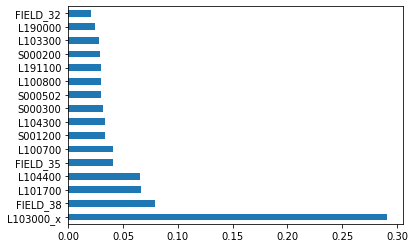

['L103000_x', 'FIELD_38', 'L101700', 'L104400', 'FIELD_35', 'L100700', 'S001200', 'L104300', 'S000300', 'S000502', 'L100800', 'L191100', 'S000200', 'L103300', 'L190000', 'FIELD_32']


In [46]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

print(list(feat_importances.nlargest(16).index))

============================= Backward Elimination
========

In [42]:
import statsmodels.regression.linear_model as sm
temp=x.copy()
temp['const']=np.ones((x.shape[0],1))
regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              L103000_y   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     6.908
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           1.13e-15
Time:                        15:49:08   Log-Likelihood:                -1078.7
No. Observations:                 190   AIC:                             2211.
Df Residuals:                     163   BIC:                             2299.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
L103000_x      0.3859      0.073      5.292      0.000       0.242       0.530
L103300      -11.1316      5.014     -2.220      0.028     -21.033      -1.230
L103100       -1.5582      0.777     -2.005      0.047      -3.092      -0.024
L104400        0.3827      0.132      2.898      0.004       0.122       0.643
L101700        0.0559      0.074      0.759      0.449      -0.090       0.201
L100700       -7.2993      5.104     -1.430      0.155     -17.378       2.779
S000200       -3.0331      1.574     -1.927      0.056      -6.141       0.075
S001200        6.1750      1.922      3.214      0.002       2.381       9.969
SEX            6.7179     45.780      0.147      0.884     -83.680      97.116
L100800       -0.5283      0.562     -0.941      0.348      -1.637       0.581
S000300       -2.6413      4.825     -0.547      0.585     -12.168       6.885
L191100     -118.6494    166.214     -0.714      0.476    -446.860     209.562
S000502        1.5928      0.776      2.052      0.042       0.060       3.126
L100500       88.4234     43.385      2.038      0.043       2.753     174.093
L190000       -4.4130      4.847     -0.911      0.364     -13.983       5.157
L104300        0.0321      0.145      0.221      0.826      -0.255       0.319
AGE           -0.7383      0.972     -0.760      0.449      -2.657       1.181
FIELD_33    -122.4969     59.810     -2.048      0.042    -240.599      -4.394
FIELD_38       8.6283      4.655      1.853      0.066      -0.564      17.821
FIELD_41      -5.6302      3.956     -1.423      0.157     -13.442       2.182
FIELD_18     -16.7666     46.122     -0.364      0.717    -107.841      74.308
FIELD_25      -6.0845     50.141     -0.121      0.904    -105.094      92.925
FIELD_42       3.7816      2.813      1.344      0.181      -1.773       9.337
FIELD_40      -1.0497      4.166     -0.252      0.801      -9.277       7.177
FIELD_32      26.8183     10.639      2.521      0.013       5.811      47.826
FIELD_35       2.3053      1.106      2.085      0.039       0.122       4.488
FIELD_31     -16.7951     14.231     -1.180      0.240     -44.897      11.306
const        -61.2485     29.905     -2.048      0.042    -120.300      -2.197
==============================================================================
Omnibus:                       41.293   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.731
Skew:                           0.959   Prob(JB):                     9.89e-22
Kurtosis:                       5.922   Cond. No.                     1.27e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.3e-25. This might indica

In [43]:
# temp=temp.drop(columns=['L103100', 'S000300','L190400','L102900','L101300','S000501','S000502','L100500','FIELD_40',
#                         'FIELD_41','FIELD_29','FIELD_18','FIELD_31','FIELD_27','FIELD_25','SEX'])
# regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
# regressor_OLS.summary()

In [ ]:
# temp=temp.drop(columns=['FIELD_33'])
# regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
# regressor_OLS.summary()

In [ ]:
print(temp.columns.shape)
temp.columns

================== Check Variance inflation factor and multi collinearity
==================== 

In [ ]:
temppd=pd.DataFrame(data2[['L103000_x', 'L103300', 'L103100', 'L100700', 'L101700', 'S000300', 'SEX', 
              'L190400', 'L100800', 'L102900', 'L190300', 'L190500', 'L101300', 'S000501', 'S000502', 
              'L100500', 'L104600','FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_41', 'FIELD_29', 'FIELD_18', 
              'FIELD_31', 'FIELD_27', 'FIELD_25', 'FIELD_32'
                          ]]).dropna() # 'L190400', 'L190500', 
temppd['y']=data.L103000_y
 

corr = (temppd.corr())
sns.heatmap(corr, vmin=-1, vmax=1) 

corr.head(20)

In [ ]:

def vifcal(inputdata,depcol):
    vifL5=[]
    import statsmodels.formula.api as sm
    xvars=inputdata.drop([depcol],axis=1)
    xvarnames=xvars.columns
    for i in range(0,xvarnames.shape[0]):
        _y=xvars[xvarnames[i]]
        _x=xvars[xvarnames.drop(xvarnames[i])]
        rsq=sm.ols(formula="_y~_x",data=xvars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print(i,', ',xvarnames[i]," VIF = ",vif)
        if(vif<5):
            vifL5.append(xvarnames[i])
    return vifL5
    
    
newcols = vifcal(temppd.drop(columns=['L190300','L190500']),'y')

In [ ]:
print(newcols)